In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from tqdm import tqdm
import pandas_profiling as ppf
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE,ADASYN
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('fea_data/data.csv')

In [3]:
# data['reccap_mean']=data.groupby('industryphy')['reccap'].transform('mean')

In [3]:
# integer_cols = ['empnum','exenum','regcap','reccap','forregcap','use_time','svd_tfidf_positive_negtive_0',
# 'svd_tfidf_positive_negtive_1','svd_countvec_positive_negtive_0','svd_countvec_positive_negtive_1']
# class_cols = ['compform','venind']

In [4]:
# for i in integer_cols:
#     train_data=data[~data[i].isnull()]
#     test_data=data[data[i].isnull()]
#     train_data = train_data.reset_index(drop=True)
#     test_data = test_data.reset_index(drop=True)
#     fea = [i for i in train_data.columns if i not in ['id','label']]
#     clf = ctb.CatBoostRegressor()
#     clf.fit(train_data[fea],train_data[i],verbose=False)
#     test_data[i] = clf.predict(test_data[fea])
#     data=pd.concat([train_data,test_data],ignore_index=True)

In [5]:
# for i in class_cols:
#     train_data=data[~data[i].isnull()]
#     test_data=data[data[i].isnull()]
#     train_data = train_data.reset_index(drop=True)
#     test_data = test_data.reset_index(drop=True)
#     fea = [i for i in train_data.columns if i not in ['id','label']]
#     clf = ctb.CatBoostClassifier()
#     clf.fit(train_data[fea],train_data[i],verbose=False)
#     test_data[i] = clf.predict(test_data[fea])
#     data=pd.concat([train_data,test_data],ignore_index=True)

In [6]:
data.isnull().sum()

id                                     0
oplocdistrict                          0
industryphy                            0
industryco                             0
dom                                    0
enttype                                0
enttypeitem                            0
state                                  0
orgid                                  0
jobid                                  0
adbusign                               0
townsign                               0
regtype                                0
empnum                                 0
compform                               0
exenum                                 0
opform                                 0
venind                                 0
enttypeminu                            0
protype                                0
oploc                                  0
regcap                                 0
reccap                                 0
forregcap                              0
enttypegb       

In [5]:
data['svd_tfidf_positive_negtive_0'].unique()

array([       nan, 0.8172997 , 0.38915962, 0.56543867, 0.99365873,
       0.95260465, 0.11090674, 0.2710547 , 0.54937918, 0.57560969,
       0.84687341, 0.96441282, 0.59342847, 0.6321604 , 0.62530514,
       0.94552128, 0.95980857, 0.66243107, 0.88007249, 0.97520783,
       0.74967998, 0.95182521, 0.78256798, 0.98281752, 0.97936476,
       0.98857818, 0.91090991, 0.85047591, 0.87482031, 0.92849975,
       0.50762736, 0.88376051, 0.9396171 , 0.83240627, 0.41533416,
       0.89786136, 0.96207005, 0.86171081, 0.9803081 , 0.92696602,
       0.86067328, 0.86862306, 0.46354484, 0.99847325, 0.52564979,
       0.99118289, 0.98628625, 0.67726155, 0.99349964, 0.89041605,
       0.95048901, 0.5832691 , 0.88789597, 0.79823148, 0.1785735 ,
       0.99552561, 0.57167237, 0.96617853, 0.43106325, 0.92283348,
       0.63738065, 0.57112028, 0.60717778, 0.98248633, 0.79965233,
       0.86567131, 0.57401492, 0.94847528, 0.67868559, 0.60140341,
       0.6275692 , 0.57467806, 0.70634657, 0.90456847, 0.77189

In [3]:
data.isnull().sum()

id                                     0
oplocdistrict                          0
industryphy                            0
industryco                             0
dom                                    0
enttype                                0
enttypeitem                            0
state                                  0
orgid                                  0
jobid                                  0
adbusign                               0
townsign                               0
regtype                                0
empnum                              5250
compform                           14234
exenum                             23487
opform                                 0
venind                             16428
enttypeminu                            0
protype                                0
oploc                                  0
regcap                               191
reccap                             17781
forregcap                          24615
enttypegb       

In [3]:
# bin = [0,2,3,5,1501]
# data['empnum_bin'] = pd.cut(data['empnum'],bins=bin, labels=False)
# bin = [0,100,127900]
# data['reccap_bin'] = pd.cut(data['reccap'],bins=bin, labels=False)
# pd.cut(X['new_power'], bin)

In [3]:
train_data=data[~data.label.isnull()]
test_data=data[data.label.isnull()]
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [5]:
# profile = train_data.profile_report(title="oil_data1")
# profile.to_file(output_file="oil_data1.html")

In [6]:
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
# enc_list = ['industryphy']
# for f in tqdm(enc_list):
#     train_data[f + '_target_enc'] = 0
#     test_data[f + '_target_enc'] = 0
#     for i, (trn_idx, val_idx) in enumerate(skf.split(train_data, train_data['label'])):
#         trn_x = train_data[[f, 'label']].iloc[trn_idx].reset_index(drop=True)
#         val_x = train_data[[f]].iloc[val_idx].reset_index(drop=True)
#         enc_df = trn_x.groupby(f, as_index=False)['label'].agg({f + '_target_enc': 'mean'})
#         val_x = val_x.merge(enc_df, on=f, how='left')
#         test_x = test_data[[f]].merge(enc_df, on=f, how='left')
#         val_x[f + '_target_enc'] = val_x[f + '_target_enc'].fillna(train_data['label'].mean())
#         test_x[f + '_target_enc'] = test_x[f + '_target_enc'].fillna(train_data['label'].mean())
#         train_data.loc[val_idx, f + '_target_enc'] = val_x[f + '_target_enc'].values
#         test_data[f + '_target_enc'] += test_x[f + '_target_enc'].values / skf.n_splits

In [6]:
fea = [i for i in train_data.columns if i not in ['id','label']]

data = train_data[fea].copy()
target = train_data['label'].copy()

# smo=SMOTE(random_state=2020)
# data,target=smo.fit_resample(data, target)
# X_train,X_test,y_train,y_test = train_test_split(train_data[fea].values,train_data['label'],test_size=0.2,random_state=2020)

In [5]:
def custom_f1_eval(y_true, y_pred):
    y_pred_label = []
    for i in y_pred:
        if i<0.5:
            y_pred_label.append(0)
        else:
            y_pred_label.append(1)

    f1_mean = f1_score(y_true, y_pred_label)
    
    return "f1", f1_mean, True
 
def f1_loss(y, pred):
    beta = 2
    p = 1. / (1 + np.exp(-pred))
    grad = p * ((beta - 1) * y + 1) - beta * y
    hess = ((beta - 1) * y + 1) * p * (1.0 - p)
 
    return grad, hess

In [7]:
# model=lgb.LGBMClassifier(
#             n_estimators=100000,
#             num_leaves=63,
#             learning_rate=0.01,
#             max_depth=6,
#             metric=None,
#             feature_fraction= 0.4,
#             bagging_fraction=0.8,
#             min_data_in_leaf= 16,
#             )
# model.set_params(**{"objective": f1_loss})

LGBMClassifier(bagging_fraction=0.8, feature_fraction=0.4, learning_rate=0.01,
               max_depth=6, metric=None, min_data_in_leaf=16,
               n_estimators=100000, num_leaves=63,
               objective=<function f1_loss at 0x000001DD1D3A28B0>)

In [9]:
# keys = []
# sk = KFold(n_splits=5, shuffle=True,random_state=2020)
# for train_, test_ in sk.split(data, target):
#     x_train = data.iloc[train_]
#     y_train = target.iloc[train_]
#     x_test = data.iloc[test_]
#     y_test = target.iloc[test_]
#     model.fit(x_train,
#               y_train,
#               eval_set=[(x_train,y_train),(x_test,y_test)],
#               eval_metric=lambda y_true, y_pred: [custom_f1_eval(y_true, y_pred)],
#               early_stopping_rounds=200,
#               verbose=100,
#              )
#     y_hat = model.predict(x_test)
#     keys.append(model.predict(test_data[fea]))
# keys = np.array(keys)
# km = keys.mean(axis=0)

Training until validation scores don't improve for 200 rounds
[100]	training's f1: 0.837945	valid_1's f1: 0.795122
[200]	training's f1: 0.866242	valid_1's f1: 0.810304
[300]	training's f1: 0.88239	valid_1's f1: 0.827103
[400]	training's f1: 0.892132	valid_1's f1: 0.818605
[500]	training's f1: 0.902408	valid_1's f1: 0.830626
[600]	training's f1: 0.912192	valid_1's f1: 0.832558
[700]	training's f1: 0.920936	valid_1's f1: 0.834499
Early stopping, best iteration is:
[567]	training's f1: 0.908286	valid_1's f1: 0.837209
Training until validation scores don't improve for 200 rounds
[100]	training's f1: 0.843931	valid_1's f1: 0.793003
[200]	training's f1: 0.871007	valid_1's f1: 0.818428
[300]	training's f1: 0.880734	valid_1's f1: 0.834688
[400]	training's f1: 0.889563	valid_1's f1: 0.839572
[500]	training's f1: 0.900606	valid_1's f1: 0.837333
Early stopping, best iteration is:
[361]	training's f1: 0.884146	valid_1's f1: 0.846361
Training until validation scores don't improve for 200 rounds
[10

In [15]:
# test_data['score']=km
# test_data['score'] = test_data['score'].apply(lambda x: 1 if x>0.5 else 0)

In [10]:
# 0.837209
model=lgb.LGBMClassifier(
            n_estimators=100000,
            num_leaves=63,
            learning_rate=0.01,
            max_depth=6,
            metric=None,
            feature_fraction= 0.4,
            bagging_fraction=0.8,
            min_data_in_leaf= 16,
            )
model.set_params(**{"objective": f1_loss})
model.fit(X_train,
          y_train,
          eval_set=[(X_train,y_train),(X_test,y_test)],
          eval_metric=lambda y_true, y_pred: [custom_f1_eval(y_true, y_pred)],
          early_stopping_rounds=200,
          verbose=100,
         )
# ,num_iteration=model.best_iteration_
pred=model.predict(test_data[fea])
test_data['score']=pred

Training until validation scores don't improve for 200 rounds
[100]	training's f1: 0.851202	valid_1's f1: 0.816626
[200]	training's f1: 0.861635	valid_1's f1: 0.825175
[300]	training's f1: 0.87375	valid_1's f1: 0.831409
[400]	training's f1: 0.887351	valid_1's f1: 0.837209
[500]	training's f1: 0.89742	valid_1's f1: 0.84186
[600]	training's f1: 0.905779	valid_1's f1: 0.839161
Early stopping, best iteration is:
[492]	training's f1: 0.896855	valid_1's f1: 0.84186


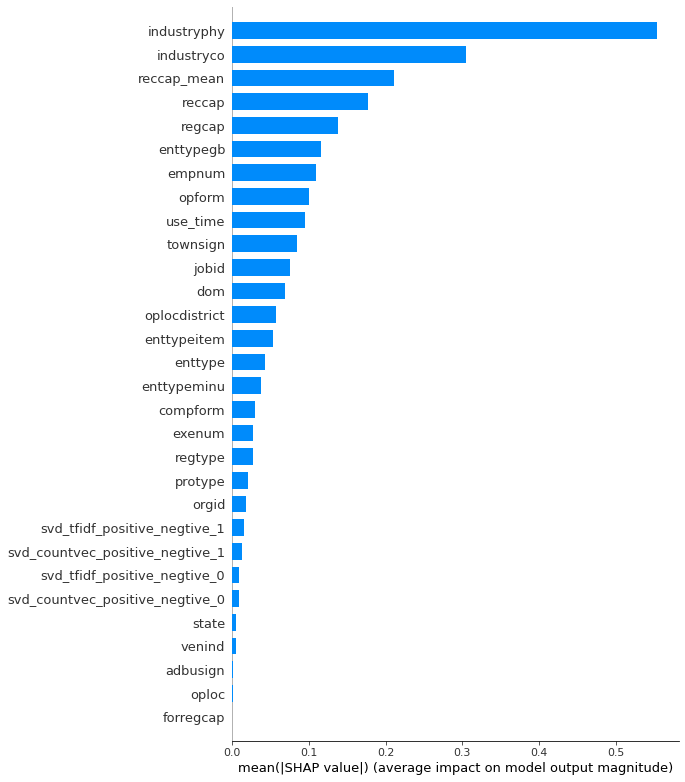

In [17]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_data[fea])
shap.summary_plot(shap_values, test_data[fea], plot_type="bar",max_display=30)
# ,'exenum', forregcap'      

In [16]:
test_data['score'] = test_data.groupby(['id'])['score'].transform('mean')
test_data.drop_duplicates(['id'],keep='first',inplace=True)
sub = pd.read_csv('../data/entprise_evaluate.csv')

In [17]:
a = test_data[~test_data['exenum'].isin([np.nan])]
a = a[~a['industryphy'].isin([9,10,11])]

In [18]:
a['score'].max()

0

In [19]:
sub.drop(['score'],axis=1,inplace=True)
sub = sub.merge(test_data[['id','score']],on='id',how='left')
sub.to_csv('result.csv',index=0)

In [20]:
count = 0
a = pd.read_csv('0.8410.csv')
b = pd.read_csv('result.csv')
for i in range(len(b)):
    if b.loc[i,'score']!=a.loc[i,'score']:
        count += 1
count

37

In [21]:
test_data['score'].value_counts()

0    9088
1     912
Name: score, dtype: int64

In [4]:
b['score'].value_counts()

0    9091
1     909
Name: score, dtype: int64

In [13]:
pd.read_csv('0.8410.csv')['score'].value_counts()

0.0    9079
1.0     921
Name: score, dtype: int64